In [32]:
# invisible
lines = open("img_resolution.txt").readlines()
resolution = lines[0].strip()
if resolution != "default":
    import matplotlib as mpl
    mpl.rcParams['figure.dpi'] = int(resolution)





## Datenvisualisierung mit Pandas


### Einführung

<img width="40%" class="imgright" src="../images/bees_and_cars.webp" srcset="../images/bees_and_cars_800w.webp 800w,../images/bees_and_cars_700w.webp 700w,../images/bees_and_cars_600w.webp 600w,../images/bees_and_cars_500w.webp 500w,../images/bees_and_cars_400w.webp 400w,../images/bees_and_cars_350w.webp 350w,../images/bees_and_cars_300w.webp 300w" alt="Pie Charts with Pandas" />

Es ist selten eine gute Idee, wenn man wissenschaftliche oder geschäftliche Daten nur rein textuell dem jeweiligen Zielpublikum präsentiert. Zur Visualisierung der Daten werden meistens verschiedene Arten von Diagrammen verwendet. Dadurch wird die Kommunikation der Information effizienter und macht die Daten greifbarer. Mit anderen Worten macht es komplexe Daten zugänglicher und verständlicher. So können numerische Daten beispielsweise  in Punkt-, Linien-, Säulen- und Balkendiagrammen sowie in Kreis-, Kuchen und Tortendiagrammen grafisch repräsentiert werden.

Wir haben bereits die starken Möglichkeiten von Matplotlib kennengelernt, um öffentlichkeitstaugliche Grafiken zu erstellen. Matplotlib ist ein Low-Level-Werkzeug, um dieses Ziel zu erreichen. 
Grafiken können noch durch Basiselemente erweitert werden wie beispielsweise Legenden, Bezeichnungen und so weiter. Mit Pandas können all diese Möglichkeiten leichter umgesetzt werden.

Wir beginnen mit einem einfachen Beispiel eines Liniendiagrammes.










### Liniendiagramm

#### Series


Sowohl die Pandas-Series, als auch die DataFrames, unterstüzen die Plot-Methode.

Sie können im folgenden einfaches Beispiel einer Linien-Grafik für ein Series-Objekt sehen. Wir verwenden eine einfache Python-Liste ```data``` für die Daten. Der Index wird für die x-Werte verwendet, oder die Domäne.





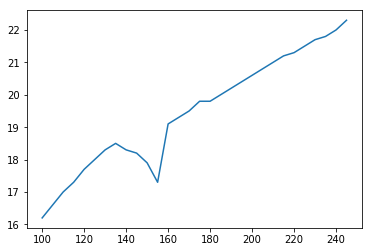

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

data = [16.2, 16.6, 17.0, 17.3, 17.7, 18.0, 
        18.3, 18.5, 18.3, 18.2, 17.9, 17.3,
        19.1, 19.3, 19.5, 19.8, 19.8, 20.0, 
        20.2, 20.4, 20.6, 20.8, 21.0, 21.2, 
        21.3, 21.5, 21.7, 21.8, 22.0, 22.3]
s = pd.Series(data, index=range(100, 250, 5))

s.plot()
plt.show()

Es ist möglich die Verwendung des Indexes zu unterdrücken, indem der Parameter ```use_index``` auf ```False``` gesetzt wird:

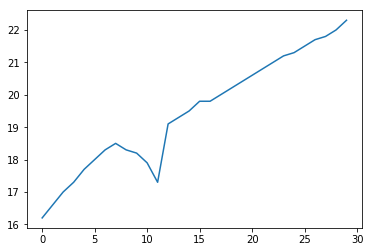

In [34]:
s.plot(use_index=False)
plt.show()



Im vorigen Beispiel bestand der Index aus numerischen Werten. In vielen Fällen besteht der Index jedoch aus Stringwerten. Wir spielen nun mit einem solchen Beispiel:





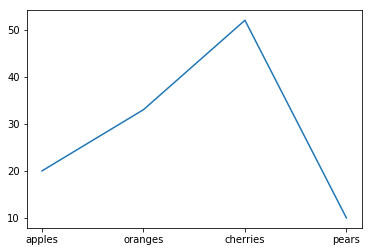

In [35]:
fruits = ['apples', 'oranges', 'cherries', 'pears']
quantities = [20, 33, 52, 10]
S = pd.Series(quantities, index=fruits)
plt.plot(S)  # notwendig ab Pandas-Version 0.23.4
#S.plot()    # funktioniert bis 0.23.4 
plt.show()

Natürlich ergibt es wenig Sinn in diesem Fall, d.h. bei kategorialen Daten,  ein Liniendiagramm zu benutzen, da die Daten ja keine kontinuierliche Funktion beschreiben. Hier empfiehlt es sich zum Beispiel, ein Säulen-, Balken oder Kreisdiagramm zu benutzen. 

#### DataFrames




Wir stellen nun die Plot-Methode für DataFrames vor. Dazu definieren wir ein Dictionary mit Bevölkerungswerten und Flächenangaben. Dieses Dictionary verwenden wir dann für die Erstellung eine DataFrame-Objektes, welches wir anschliessend für die Grafik verwenden wollen:



In [36]:
# prog4book
monate = ["Januar", "Februar", "März", "April", "Mai", "Juni", 
          "Juli", "August", "September", "Oktober", "November", 
          "Dezember"]
max_temperatur = [17, 16, 17, 19, 23, 25, 28, 28, 27, 24, 21, 18]
durchschnitts_temperatur = [14, 13, 14, 17, 20, 24, 26, 27, 
                            25, 22, 19, 15]
min_temperatur = [10, 9, 11, 14, 18, 22, 25, 26, 24, 19, 15, 12]
niederschlag_mm = [296, 278, 117, 79, 74, 24, 1, 27, 72, 155, 
                   110, 283]

kreta_dict = {"Maximal": max_temperatur, 
              "Durchschnitt":durchschnitts_temperatur, 
              "Minimal": min_temperatur, 
              "Niederschlag": niederschlag_mm}

kreta_df = pd.DataFrame(kreta_dict, index=monate)
print(kreta_df.head(5))

         Maximal  Durchschnitt  Minimal  Niederschlag
Januar        17            14       10           296
Februar       16            13        9           278
März          17            14       11           117
April         19            17       14            79
Mai           23            20       18            74


In [37]:
# prog4web
import pandas as pd

cities = {"Name": ["London", "Berlin", "Madrid", "Rom", 
                   "Paris", "Wien", "Bukarest", "Hamburg", 
                   "Budapest", "Warschau", "Barcelona", 
                   "München", "Mailand"],
          "Bevölkerung": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,
                         1350680],
          "Fläche" : [1572, 891.85, 605.77, 1285, 
                    105.4, 414.6, 228, 755, 
                    525.2, 517, 101.9, 310.4, 
                    181.8]
}

city_frame = pd.DataFrame(cities,
                          columns=["Bevölkerung", "Fläche"],
                          index=cities["Name"])
print(city_frame)

           Bevölkerung   Fläche
London         8615246  1572.00
Berlin         3562166   891.85
Madrid         3165235   605.77
Rom            2874038  1285.00
Paris          2273305   105.40
Wien           1805681   414.60
Bukarest       1803425   228.00
Hamburg        1760433   755.00
Budapest       1754000   525.20
Warschau       1740119   517.00
Barcelona      1602386   101.90
München        1493900   310.40
Mailand        1350680   181.80





Der folgende Code erstellt die Grafik unseres DataFrames. Die Flächen-Werte werden noch mit 1000 multipliziert, da die "Flächen"-Linie sonst unsichtbar bzw. durch die x-Achse verdeckt würde:


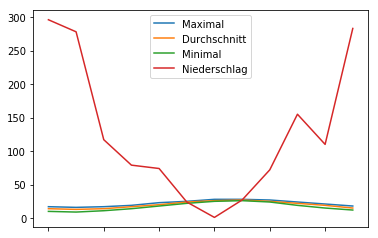

In [38]:
# prog4book
kreta_df.plot()

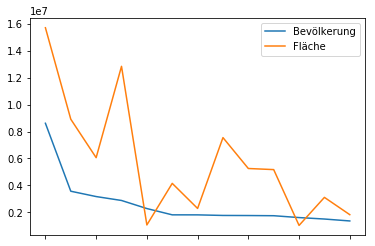

In [39]:
# prog4web
city_frame["Fläche"] *= 10000
city_frame.plot()
plt.show()




Die Beschriftung der Achsen entspricht nicht unseren Wünschen: Zum einen ist die X-Achse unbeschriftet und zum anderen sind die Werte der Y-Achse in wissenschaftlicher Notation angegeben. Letzeres erkennt man an der Beschriftung ```le7```, die sich oben links oberhalb der Linie befindet. ```le7``` bedeutet, dass die Werte der Y-Achse mit $10^7$ multipliziert werden müssen.

Die X-Achse können wir mit den Städtenamen versehen, indem wir explizit <code>xticks</code> auf den Wert <code>range(len(city_frame.index)</code> setzen. Der Parameter ```ret``` ist hierbei auch von besonderer Wichtigkeit. Mit ihm haben wir den Schrägdruck der Städtenamen erreicht, d.h. wir haben die Städtenamen um 60 Grad bezogen auf die Horizontale gedreht. Lässt man ihn weg oder setzt ihn auf Null, dann werden die Städtnamen überlappend gedruckt und damit unlesbar.


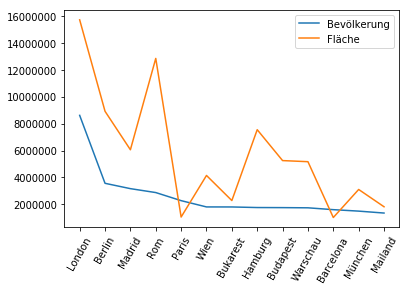

In [40]:
# prog4web
import matplotlib
city_frame.plot(xticks=range(len(city_frame.index)),
                rot=60)
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d')) 

plt.show()

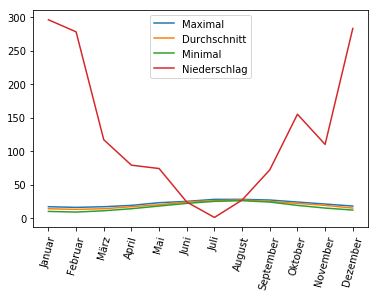

In [41]:
# prog4book
kreta_df.plot(xticks=range(len(kreta_df.index)),
              rot=75)


#### Sekundärachsen (Twin Axes)


Die Flächen-Spalte hatten wir mit 10000 multipliziert, damit sie besser dargestellt werden kann. 
Die bessere Lösung besteht in der Verwendung von Sekundärachsen (engl. Twin Axes). Wir demonstrieren ihre Anwendung im nächsten Beispiel. Zunächst dividieren wir die Spalte ```Fläche``` durch 10000, um die ursprünglichen Werte wiederherzustellen:


In [42]:
# prog4web
city_frame["Fläche"] /= 10000


Um die Darstellung mit Sekundärachsen zu erreichen, benötigen wir subplots aus dem Modul matplotlib und die Funktion "twinx":


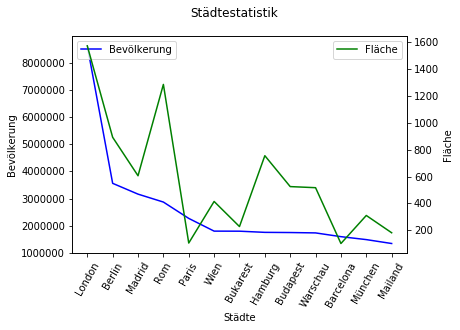

In [43]:
# prog4web
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.suptitle("Städtestatistik")
ax.set_ylabel("Bevölkerung")
ax.set_xlabel("Städte")

ax2 = ax.twinx()
ax2.set_ylabel("Fläche")

line1 = city_frame["Bevölkerung"].plot(ax=ax, 
                                       style="b-",
                                       xticks=range(len(city_frame.index)),
                                       use_index=True, 
                                       rot=60)

line2 = city_frame["Fläche"].plot(ax=ax2, 
                                  style="g-")


ax.legend(["Bevölkerung"], loc=2)
ax2.legend(loc=1)


plt.show()

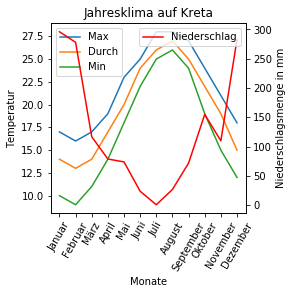

In [44]:
# prog4book
import matplotlib.pyplot as plt

ax = kreta_df['Maximal'].plot(xticks=range(len(kreta_df.index)),
                              figsize=(3.5, 3.5),
                              use_index=True, 
                              title='Jahresklima auf Kreta',
                              rot=60)

kreta_df['Durchschnitt'].plot(ax=ax,
                              xticks=range(len(kreta_df.index)),
                              use_index=True, 
                              rot=60)
kreta_df['Minimal'].plot(ax=ax,
                         xticks=range(len(kreta_df.index)),
                         use_index=True, 
                         rot=60)

ax2 = ax.twinx()

kreta_df['Niederschlag'].plot(ax=ax2, 
                              style="r-")


ax.set_ylabel('Temperatur')
ax.set_xlabel('Monate')
ax2.set_ylabel('Niederschlagsmenge in mm')

ax.legend(['Max', 'Durch', 'Min'], loc=2)
ax2.legend(loc=1)


plt.show()


Wir können Sekundärachsen auch direkt in Pandas ohne Zuhilfenahme von Sublṕlots erzeugen, wie wir im Code des folgenden Programmes sehen:


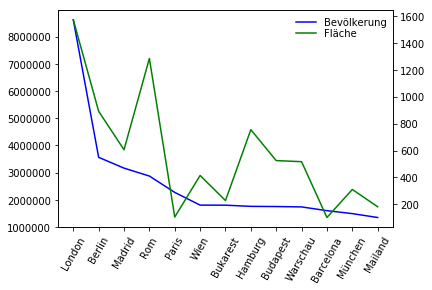

In [45]:
# prog4web
import matplotlib.pyplot as plt

ax1 = city_frame["Bevölkerung"].plot(style="b-",
                                     xticks=range(len(city_frame.index)),
                                     use_index=True, 
                                     rot=60)
ax2 = ax1.twinx()
#ax2.spines['right'].set_position(('axes', 1.0))
city_frame["Fläche"].plot(ax=ax2,
                          style="g-")



ax1.legend(loc=(.7,.9), frameon = False)
ax2.legend( loc=(.7, .85), frameon = False)


#### Mehrere Y-Achsen

Es lassen sich noch weitere Achsen hinzufügen. 


Wir fügen eine weitere Achse zum ```city_frame``` hinzu, indem wir eine neue Spalte mit der Bevölkerungsdichte erstellen, d.h. die Anzahl der Menschen pro Quadratkilometer:




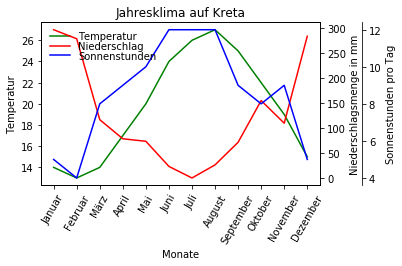

In [46]:
# prog4book

import matplotlib.pyplot as plt

sonnenstunden = [5, 4, 8, 9, 10, 12, 12, 12, 9, 8, 9, 5]
kreta_dict = {"Maximal": max_temperatur, 
              "Durchschnitt":durchschnitts_temperatur, 
              "Minimal": min_temperatur, 
              "Niederschlag": niederschlag_mm,
              "Sonnenstunden": sonnenstunden}
kreta_df = pd.DataFrame(kreta_dict, index=monate)

ax = kreta_df['Durchschnitt'].plot(xticks=range(len(kreta_df.index)), 
                                   figsize=(5, 3),
                                   style="g-",
                                   use_index=True, 
                                   title='Jahresklima auf Kreta',
                                   rot=60)


ax_regen, ax_sonne = ax.twinx(), ax.twinx()

kreta_df['Niederschlag'].plot(ax=ax_regen, 
                              style="r-")

kreta_df['Sonnenstunden'].plot(ax=ax_sonne, 
                               style="b-")

ax.set_ylabel('Temperatur')
ax.set_xlabel('Monate')
ax_regen.set_ylabel('Niederschlagsmenge in mm')
ax_sonne.set_ylabel('Sonnenstunden pro Tag')

ax_regen.spines['right'].set_position(('axes', 1.0))
ax_sonne.spines['right'].set_position(('axes', 1.15))

ax.legend(['Temperatur'], 
          loc='upper left', 
          bbox_to_anchor=(0.0, 1.0), 
          frameon=False)
ax_regen.legend(loc='upper left', 
                bbox_to_anchor=(0.0, 0.94), 
                frameon=False)
ax_sonne.legend(loc='upper left', 
                bbox_to_anchor=(0.0, 0.88),
                frameon=False)

#help(ax_sonne.legend)

#bbox_to_anchor=(1.5, 1)

plt.show()

In [47]:
# prog4web
city_frame["Dichte"] = city_frame["Bevölkerung"] / city_frame["Fläche"]

print(city_frame.head(3))

        Bevölkerung   Fläche       Dichte
London      8615246  1572.00  5480.436387
Berlin      3562166   891.85  3994.131300
Madrid      3165235   605.77  5225.143206



Damit gibt es drei Spalten zu zeichnen. Für diesen Zweck erstellen wir drei Achsen um die Werte darzustellen:


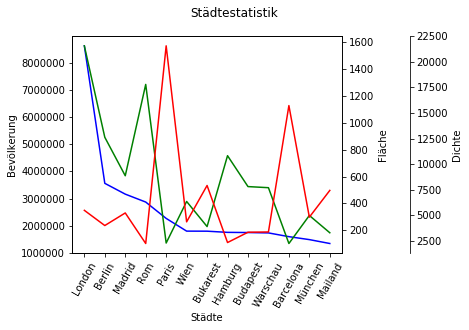

In [48]:
# prog4web
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.suptitle("Städtestatistik")
ax.set_ylabel("Bevölkerung")
ax.set_xlabel("Städte")

ax_area, ax_density = ax.twinx(), ax.twinx() 
ax_area.set_ylabel("Fläche")
ax_density.set_ylabel("Dichte")

rspine = ax_density.spines['right']
rspine.set_position(('axes', 1.25))
ax_density.set_frame_on(True)
ax_density.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

city_frame["Bevölkerung"].plot(ax=ax, 
                               style="b-",
                               xticks=range(len(city_frame.index)),
                               use_index=True, 
                               rot=60)

city_frame["Fläche"].plot(ax=ax_area, 
                         style="g-")

city_frame["Dichte"].plot(ax=ax_density, 
                          style="r-")

plt.show()

### Ein komplexeres Beispiel

Wir nutzen das zuvor erlangte Wissen im nächsten Beispiel. Wir verwenden dazu eine Datei mit Besucherstatistiken der Webseite python-course.eu. Der Inhalt der Datei sieht folgendermaßen aus:

```
Month Year 'Unique visitors' 'Number of visits' Pages Hits Bandwidth Unit
Jun 2010 11 13 42 290 2.63 MB
Jul 2010 27 39 232 939 9.42 MB
Aug 2010 75 87 207 1,096 17.37 MB

...

Aug 2018 407,512 642,542 1,223,319 7,829,987 472.37 GB
Sep 2018 463,937 703,327 1,187,224 8,468,723 514.46 GB
Oct 2018 537,343 826,290 1,403,176 10,013,025 620.55 GB
Nov 2018 514,072 781,335 1,295,594 9,487,834 642.16 GB
Dec 2018 464,763 682,741 1,209,298 8,348,946 544.44 GB
```

Das Einlesen dieser Datei können wir mittels ```read_csv``` bewerkstelligen. Die Daten sind durch Whitespaces getrennt. Damit auch eine Folge von Whitespaces als ein Delimiter erkannt wird, benutzen wir einen regulären Ausdruck, d.h. ```r'\s+'```. Die Tausenderstellen sind mit "," getrennt.

In [49]:
import pandas as pd

data_path = 'data1/'
fname = 'python_course_monthly_history.txt'
webstats = pd.read_csv(data_path + fname, 
                       quotechar='"',
                       thousands=',',
                       delimiter=r'\s+')
# umbenennen der Spaltennamen:
webstats.columns = ['Month', 'Year', 'Visitors', 'Visits', 
                    'Pages', 'Hits', 'Bandwidth', 'Unit']

webstats.head()

,Month,Year,Visitors,Visits,Pages,Hits,Bandwidth,Unit
0,Jun,2010,11,13,42,290,2.63,MB
1,Jul,2010,27,39,232,939,9.42,MB
2,Aug,2010,75,87,207,1096,17.37,MB
3,Sep,2010,171,221,480,2373,39.63,MB
4,Oct,2010,238,301,552,2872,52.13,MB


Wir erkennen, dass die Angaben für die Bandbreite (Bandwidth) nicht in einer festen Einheit angegeben sind, sondern von der letzten Spalte abhängen. Sie können in Bytes, Megabytes oder in Gigabytes sein. Die Funktion ```unit_convert``` wandelt ein Tupel, bestehend aus einem Wert und einer Einheit, in einen Bytewert um. Wir wenden diese Funktion nun auf die beiden letzten Spalten an. Der Parameter ```axis``` muss auf 1 gesetzt sein, damit die Funktion jeweils auf einen Wert und eine Einheit angewendet wird:

In [50]:
def unit_convert(x):
    value, unit = x
    if unit == 'MB':
        value *= 1024
    elif unit == 'GB':
        value *= 1048576 # i.e. 1024 **2
    return value

cols = ['Bandwidth', 'Unit']
bandwidth = webstats[cols].apply(unit_convert, 
                                 axis=1)

Als Nächstes löschen wir die ```'unit'```-Spalte und ersetzen die ```'Bandwidth'```-Spalte mit den neu berechneten Werten ```bandwidth```. Außerdem ersetzen wir die Monatsangaben durch einen neuen Stringwert, bestehend aus Monat und Jahr. Die Spalte ```Year``` löschen wir dann.

In [51]:
del webstats['Unit']
webstats['Bandwidth'] = bandwidth

def concat(x):
    """concatenates month and year"""
    return x[0] + " " + str(x[1])

month_year = webstats[['Month', 'Year']]
month_year = month_year.apply(concat, 
                              axis=1)
webstats['Month'] = month_year
del webstats['Year']

webstats.set_index('Month', inplace=True)
del webstats['Bandwidth']


webstats[:10]


,Visitors,Visits,Pages,Hits
Month,,,,
Jun 2010,11,13,42,290
Jul 2010,27,39,232,939
Aug 2010,75,87,207,1096
Sep 2010,171,221,480,2373
Oct 2010,238,301,552,2872
Nov 2010,353,455,912,5086
Dec 2010,366,423,944,4884
Jan 2011,911,1111,2321,11442
Feb 2011,1488,1807,4139,22291


Nun sind wir bereit für den Plot des DataFrames:

[]

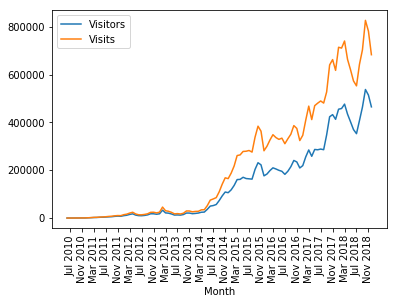

In [52]:
xticks = range(1, len(webstats.index), 4)
webstats[['Visitors', 'Visits']].plot(use_index=True, 
                                      rot=90,
                                      xticks=xticks)

plt.plot()

Wir berechnen nun die durchschnittliche Anzahl der Besuche pro Besucher.

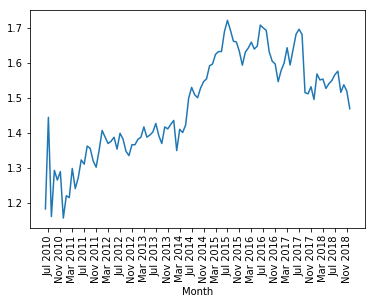

In [53]:
ratio = pd.Series(webstats["Visits"] / webstats["Visitors"],
                  index=webstats.index)
ratio.plot(use_index=True, 
           xticks=range(1, len(ratio.index), 4),
           rot=90)
plt.show()

#### Spalten mit Zeichenketten (Strings) in Floats wandeln

Im Verzeichnis <code>data1</code> haben wir die Datei 

<code>tiobe_programming_language_usage_nov2018.txt</code> 

mit einem Nutzungs-Ranking von Programmiersprachen. Die Daten wurden gesammelt und aufbereitet von TIOBE im November 2018.

Die Datei hat folgenden Inhalt:

<pre>
Position    "Language"          Percentage
1           Java                16.748%
2           C                   14.396%
3           C++                  8.282%
4           Python               7.683%
5           "Visual Basic .NET"  6.490%
6           C#                   3.952%
</pre>

Die Prozent-Spalte enthält Strings mit dem Prozent-Zeichen. Das Zeichen können wir nutzen (oder loswerden), indem wir die Funktion ```read_csv``` verwenden. Alles, was wir dafür tun müssen, ist, eine Konverter-Funktion zu definieren. Diese Konverter-Funktion übergeben wir dann an ```read_csv``` mit dem Parameter ```converters```.

                      Percentage
Language                        
Java                      16.748
C                         14.396
C++                        8.282
Python                     7.683
Visual Basic .NET          6.490
C#                         3.952
JavaScript                 2.655
PHP                        2.376
SQL                        1.844
Go                         1.495
Objective-C                1.476
Swift                      1.455
Delphi/Object Pascal       1.423
R                          1.407
Assembly language          1.108
Ruby                       1.091
MATLAB                     1.030
Perl                       1.001
PL/SQL                     1.000
Visual Basic               0.854


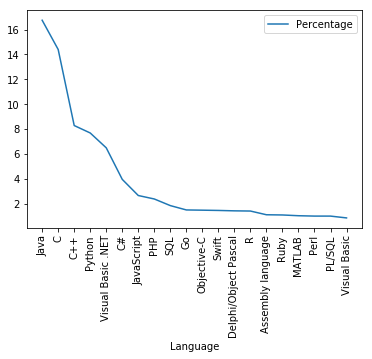

In [54]:
def strip_percentage_sign(x):
    return float(x.strip('%'))

data_path = "data1/"
fname = "tiobe_programming_language_usage_nov2018.txt"
progs = pd.read_csv(data_path + fname, 
                   quotechar='"',
                   thousands=",",
                   index_col=1,
                   converters={'Percentage':strip_percentage_sign},
                   delimiter=r"\s+")

del progs["Position"]

print(progs)
progs.plot(xticks=range(len(progs.index)),
           use_index=True, 
           rot=90)
plt.show()

### Balkendiagramme in Pandas

Balkendiagramme mit Pandas zu erstellen, ist ebenso einfach wie Liniendiagramme. Dazu fügen wir den Schlüsselwort-Parameter ```kind``` zu plot-Methode hinzu und setzen den Wert auf ```bar```.

#### Ein einfaches Beispiel

[]

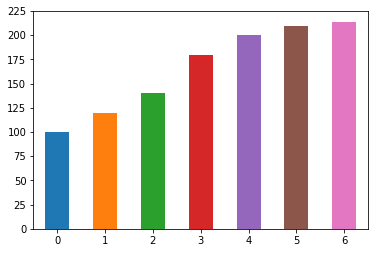

In [55]:
import pandas as pd

data = [100, 120, 140, 180, 200, 210, 214]
s = pd.Series(data, index=range(len(data)))

s.plot(kind="bar", rot=0)
plt.plot()

#### Balken-Grafik für die Programmiersprachennutzung

Wir gehen zurück zum Beispiel des Programmiersprachen-Rankings. Jetzt generieren wir eine Balkengrafik der sechs meistverwendeten Programmiersprachen:

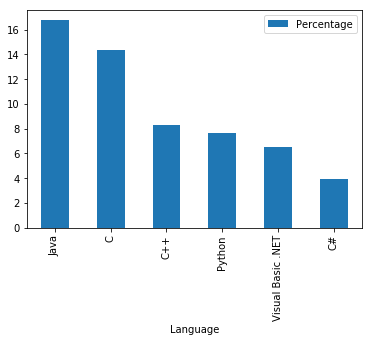

In [56]:
progs[:6].plot(kind="bar")

Nun die Balkendiagramme mit allen Programmiersprachen:

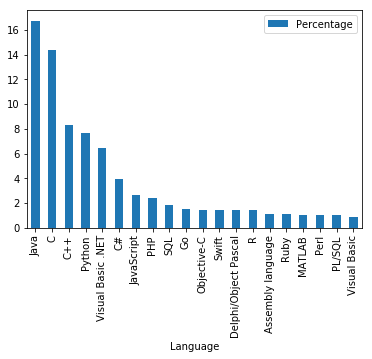

In [57]:
progs.plot(kind="bar")

#### Farbgebung einer Balken-Grafik

Es ist möglich, die Balken individuell zu färben, indem eine Liste dem Schlüsselwort-Parameter ```color``` zugewiesen wird:

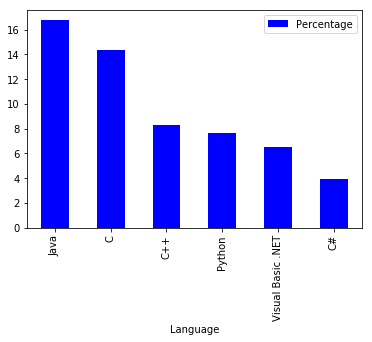

In [58]:
my_colors = ['b', 'r', 'c', 'y', 'g', 'm']
progs[:6].plot(kind="bar",
               color=my_colors)

### Kuchen-Diagramme in Pandas


#### Ein einfaches Beispiel

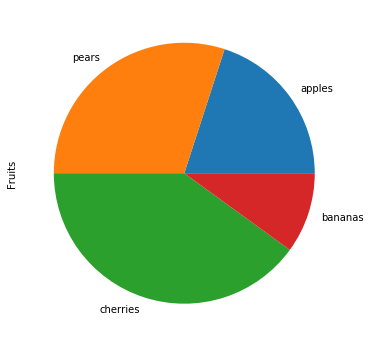

In [59]:
import pandas as pd

fruits = ['apples', 'pears', 'cherries', 'bananas']
series = pd.Series([20, 30, 40, 10], 
                   index=fruits, 
                   name='Fruits')

series.plot.pie(figsize=(6, 6))

Obiges Kreisdiagramm lässt einen an einen Kuchen denken, und wie bei einem Kuchen, kann man einzelne "Stücke" herausziehen, was sich mit dem Parameter ```explode``` bewerkstelligen lässt. Diesem kann man eine Array-ähnliche Struktur, wie z.B. ein Tupel oder Liste, übergeben, die den Abstand vom Kreismittelpunkt beschreibt. Die Default-Werte sind 0, d.h. die "Kuchenstücke" sind nicht herausgezogen:

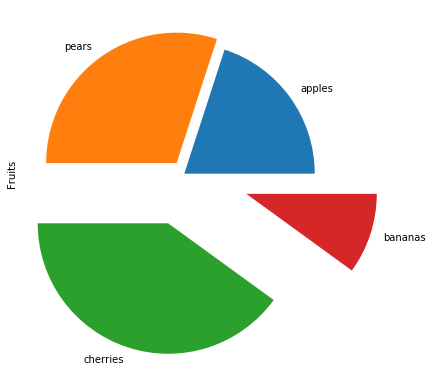

In [60]:
fruits = ['apples', 'pears', 'cherries', 'bananas']

series = pd.Series([20, 30, 40, 10], 
                   index=fruits, 
                   name='Fruits')
explode = [0, 0.10, 0.40, 0.5]
series.plot.pie(figsize=(6, 6),
                explode=explode)

Wir generieren die vorherige Balken-Grafik (Programmiersprachen) nun als Kuchendiagramm:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7338e1a9e8>],
      dtype=object)

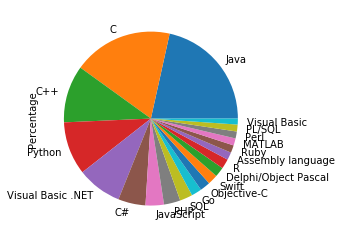

In [61]:
import matplotlib.pyplot as plt

my_colors = ['b', 'r', 'c', 'y', 'g', 'm']
progs.plot.pie(subplots=True,
               legend=False)


Es ist nicht schön, dass das y-Label ```Percentage``` innerhalb der Grafik angezeigt wird. Wir entfernen die Bezeichnung mit der Funktion ```plt.ylabel```.

Text(0, 0.5, '')

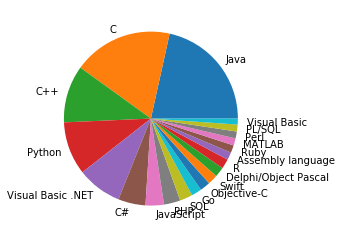

In [62]:
import matplotlib.pyplot as plt

my_colors = ['b', 'r', 'c', 'y', 'g', 'm']
progs.plot.pie(subplots=True,
               legend=False)

plt.ylabel('')

Alle Alternativen für den Parameter ```kind``` im Überblick:

- ```line```: Liniendiagramm (Default-Wert)
- ```bar```: Säulendiagramm
- ```hist```: Histogramm
- ```box```: Kastengrafik (engl. Box Plot)
- ```kde```: Kernel Density Estimation plot
- ```density```: wie kde
- ```area```: Flächendiagramm
- ```pie```: Kreisdiagramm

